# Customer segmentation analysis based on their personality and behavior

Objective
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:

Develop personalized marketing campaigns to increase conversion rates.
Create effective retention strategies for high-value customers.
Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.
As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.

In [22]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
# to compute distances
from scipy.spatial.distance import cdist, pdist
# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# to suppress warnings
import warnings
warnings.filterwarnings("ignore")
import time

from google.colab import drive
drive.mount('/content/drive')
# loading data into a pandas dataframe
data = pd.read_csv(r"/content/drive/My Drive/Customer_Personality_Segmentation.csv", sep="\t")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Task 1:  What are the data types of all the columns?

print(data.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [7]:
# Task 2: Check the statistical summary of the data. What is the average household income?

print(data.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [11]:
# Task 3:  Are there any missing values in the data? If yes, treat them using an appropriate method

print(data.isnull().sum())

#missing values are only in Income column, so we can concentrate on it
# treating missing values by replacing them with the mean
data['Income'] = data['Income'].fillna(data['Income'].mean())

# check whether there are any nan values left
print(data.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines

In [12]:
# Task 4: Are there any duplicates in the data?
print(data.duplicated().sum())

0


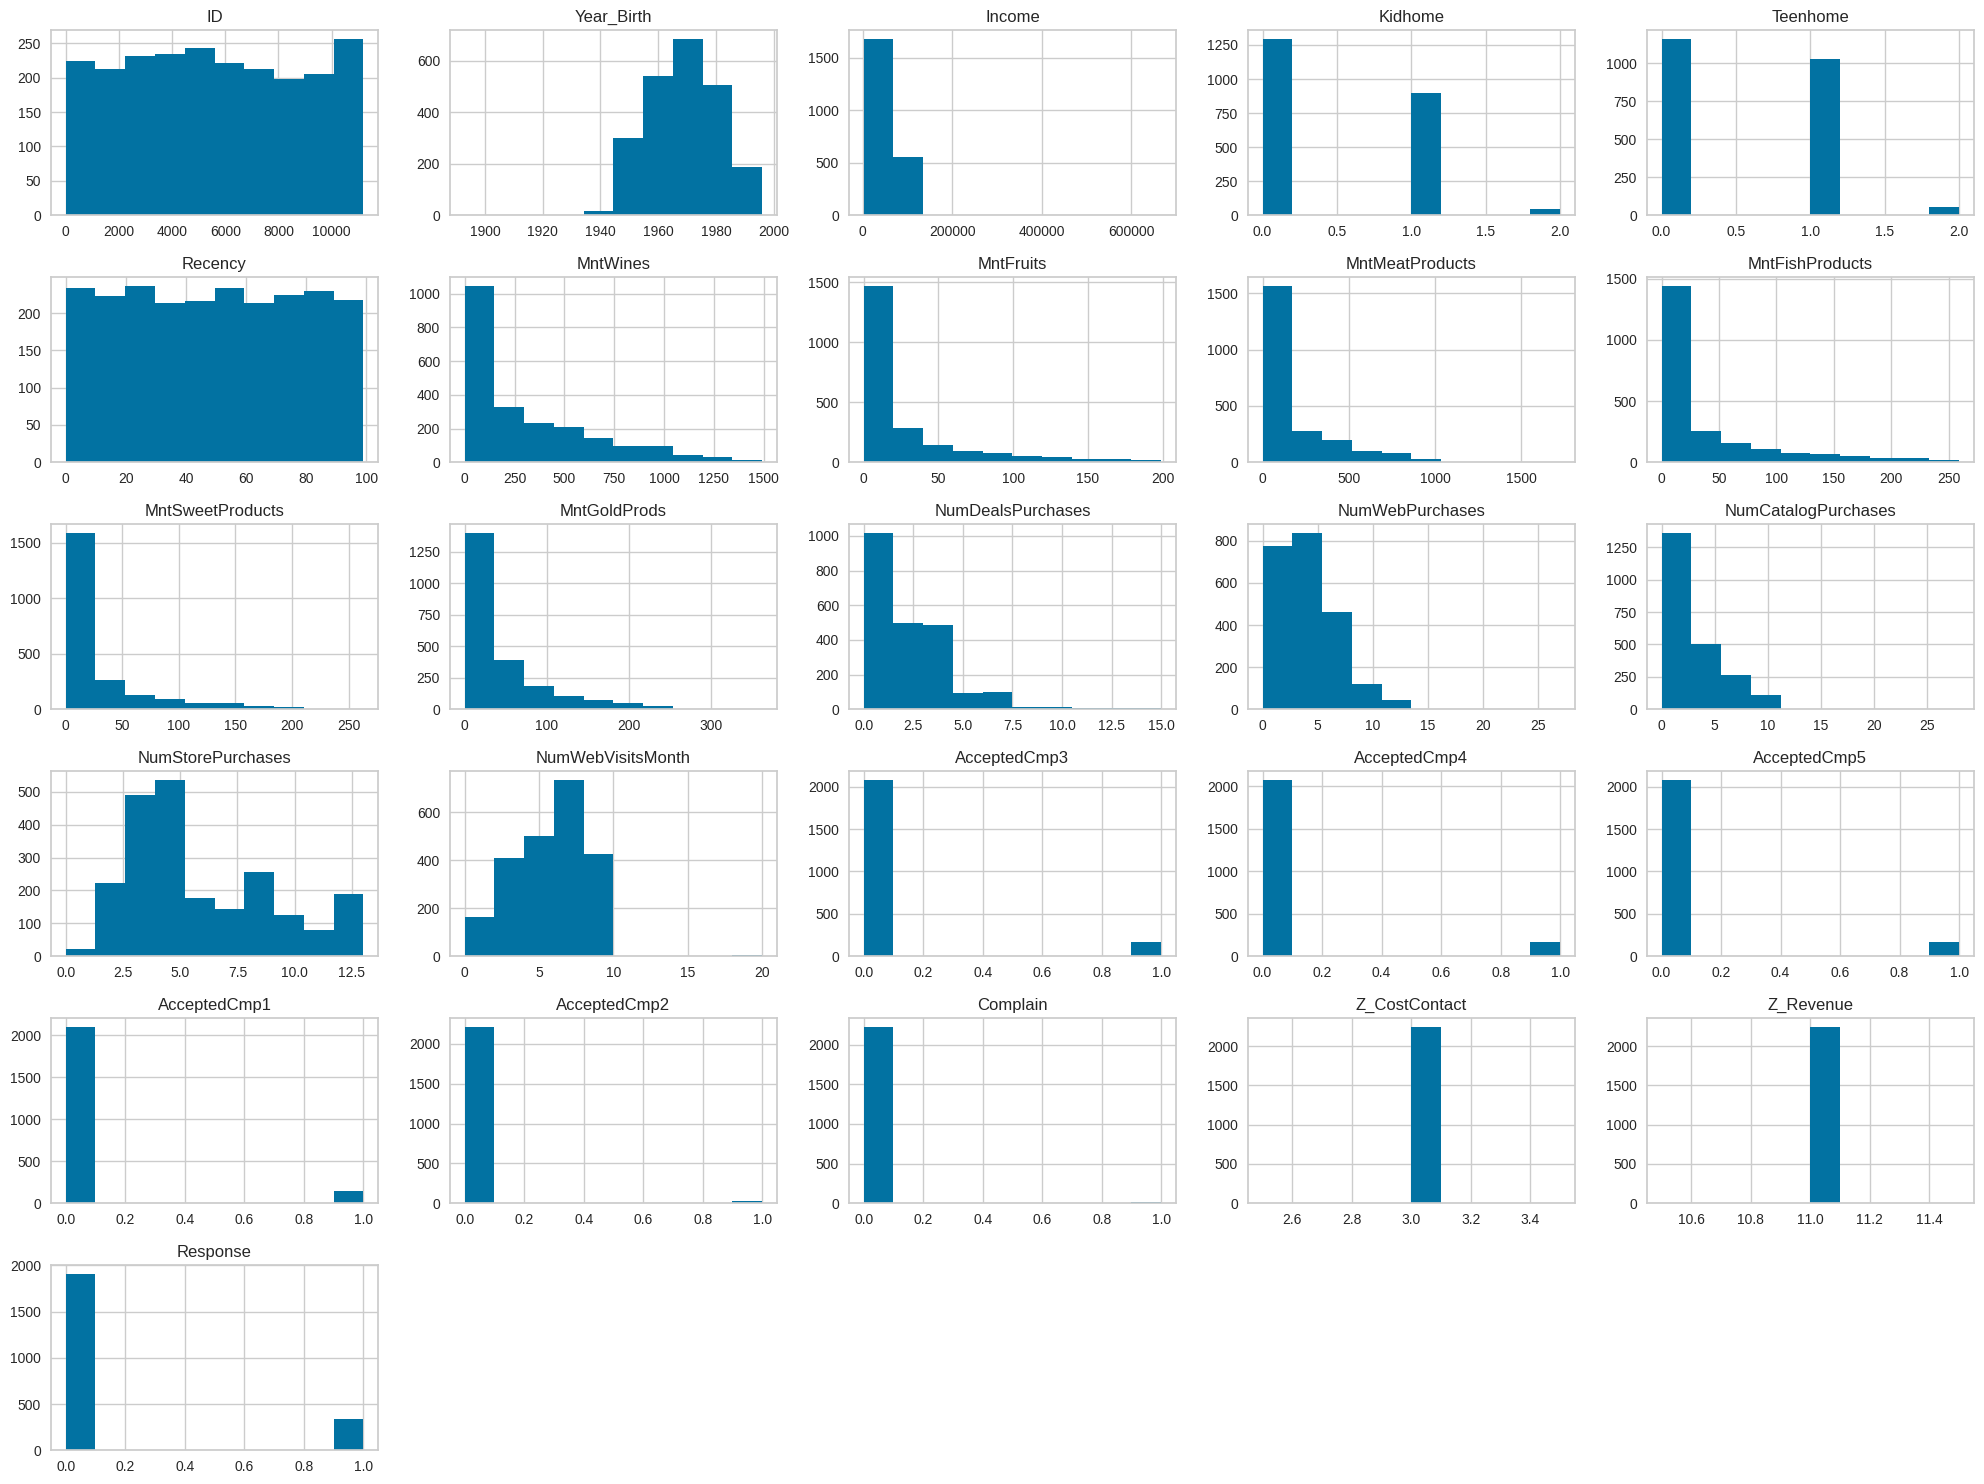

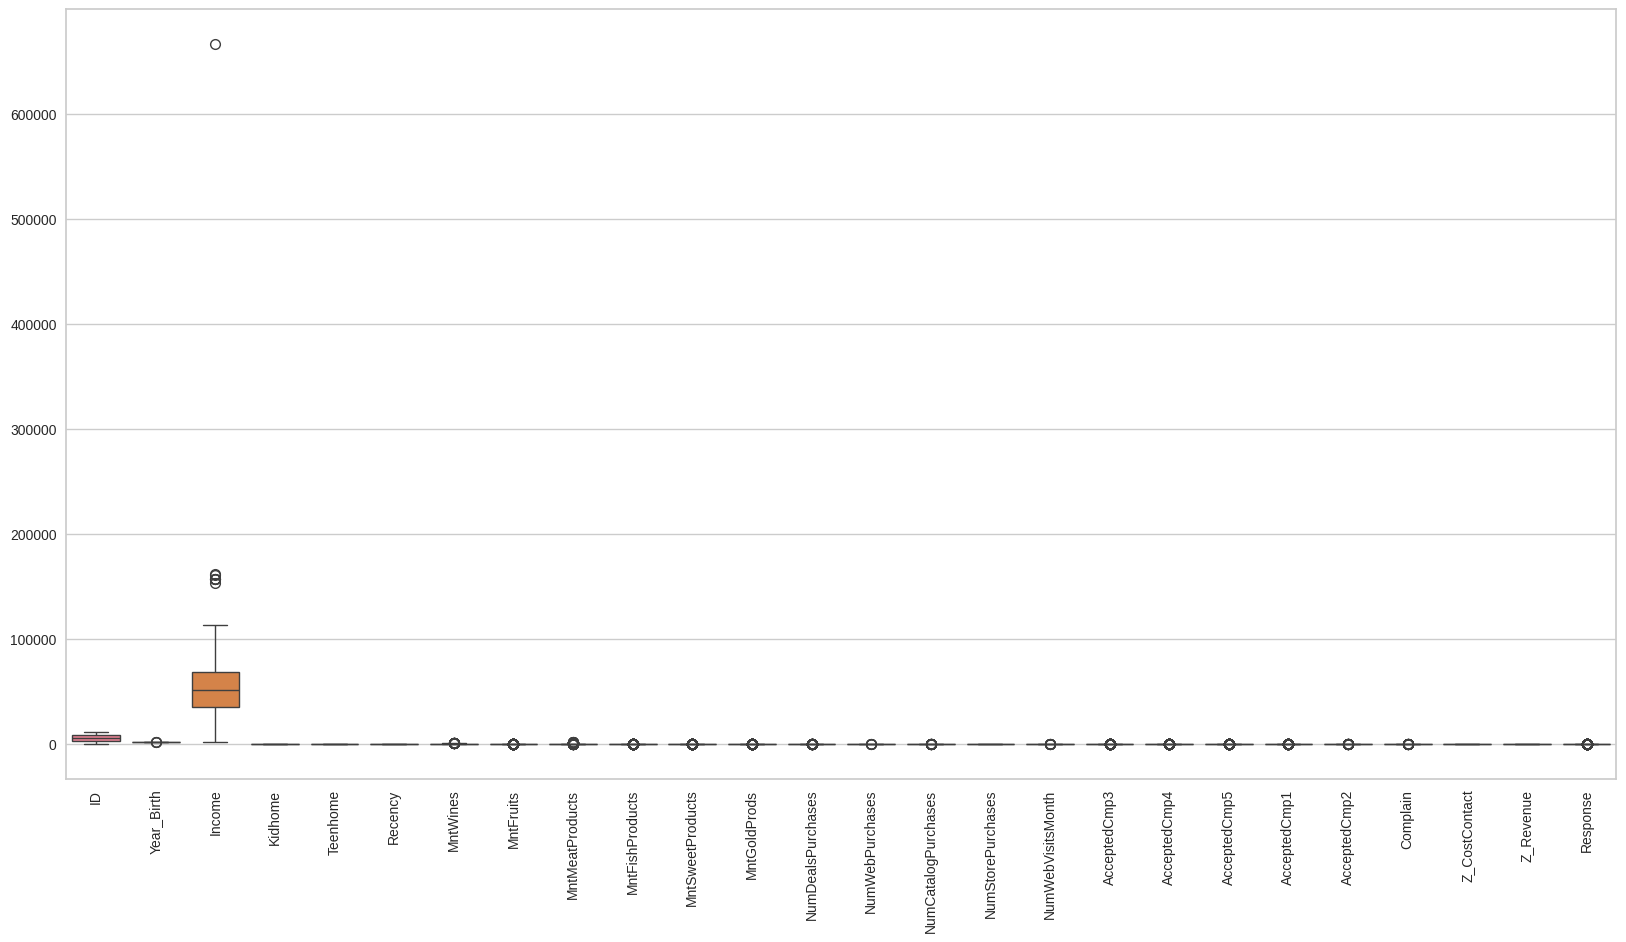

In [15]:
# Task 5:
#To vizualize histograms
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[num_cols].hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

# To viualize boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[num_cols])
plt.xticks(rotation=90)
plt.show()

Results:
- Most of the clients have an income of up to $100,000.
- The cost of wine (MntWines) is significantly higher than for other product categories.
- Most of the clients do not have children (Kid home) or teenagers (Teen home).


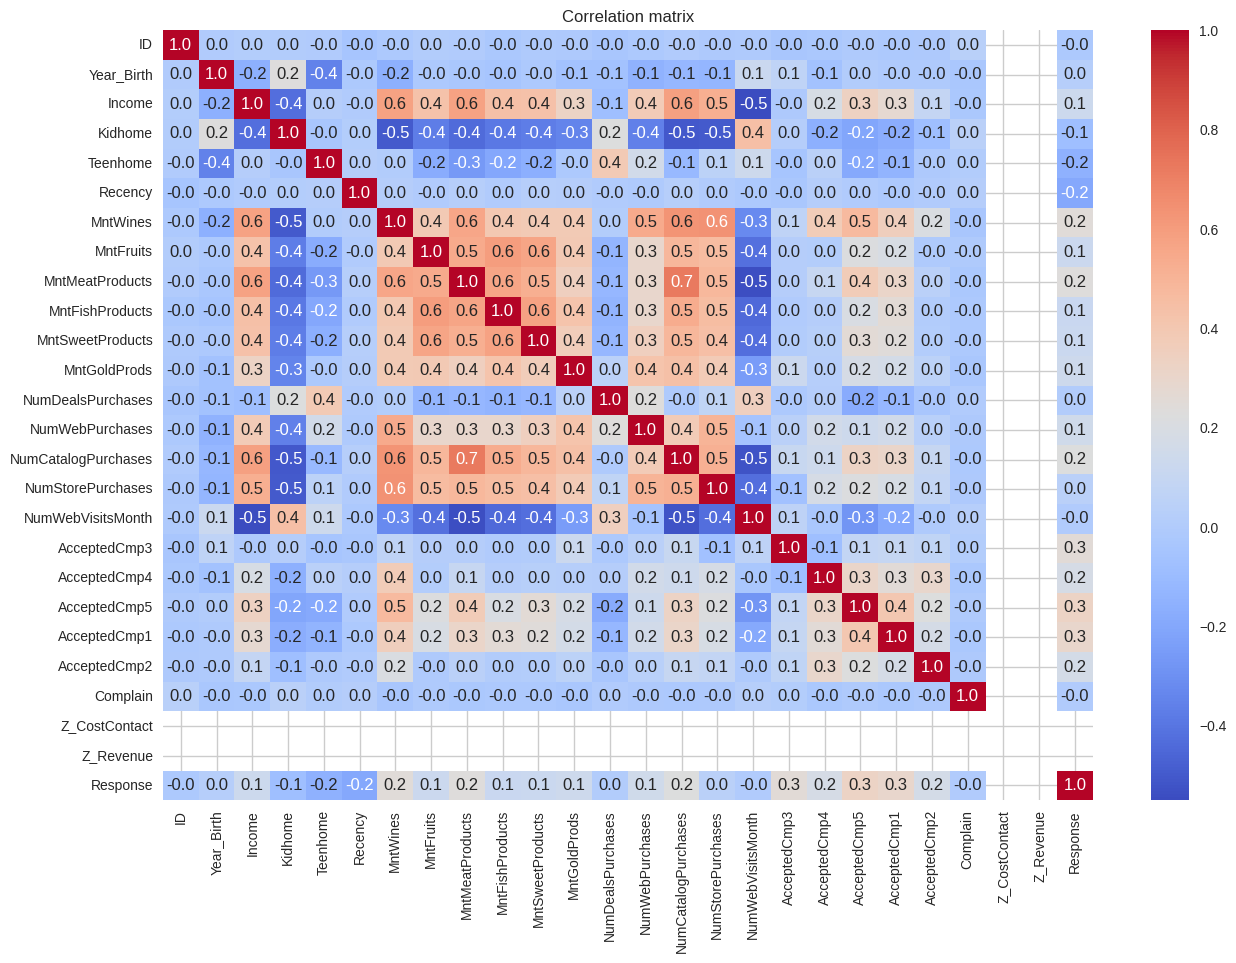

In [18]:
# Task 6: Perform multivariate analysis to explore the relationsips between the variables.
# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

Results:

There is a strong positive correlation between income and food expenses.

The costs of different product categories correlate with each other.

The number of purchases in stores positively correlates with expenses.

In [19]:
#Clusterization

features = ['Income', 'MntWines', 'MntMeatProducts', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']
cluster_data = data[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

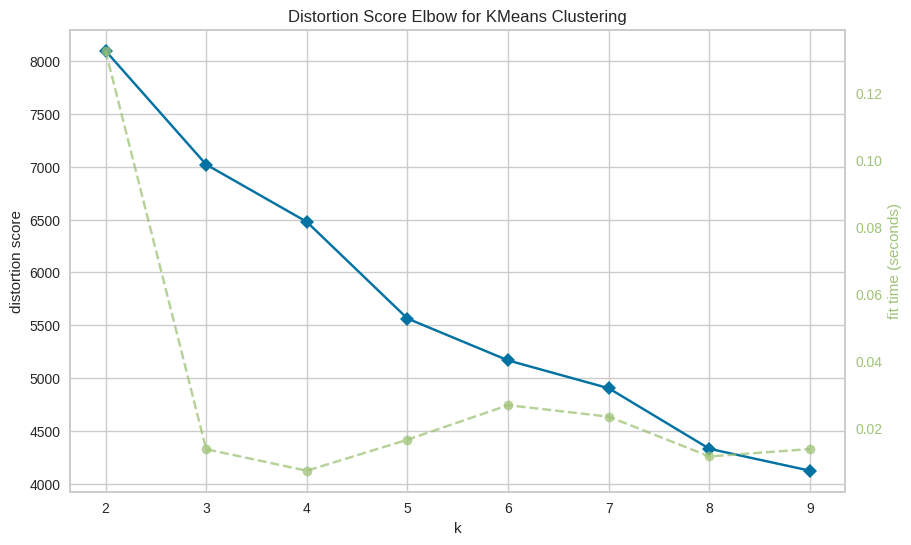

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Task 7: Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?
#KElbowVisualizer to estimate it
plt.figure(figsize=(10, 6))
elbow = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
elbow.fit(scaled_data)
elbow.show()

The best number is 4

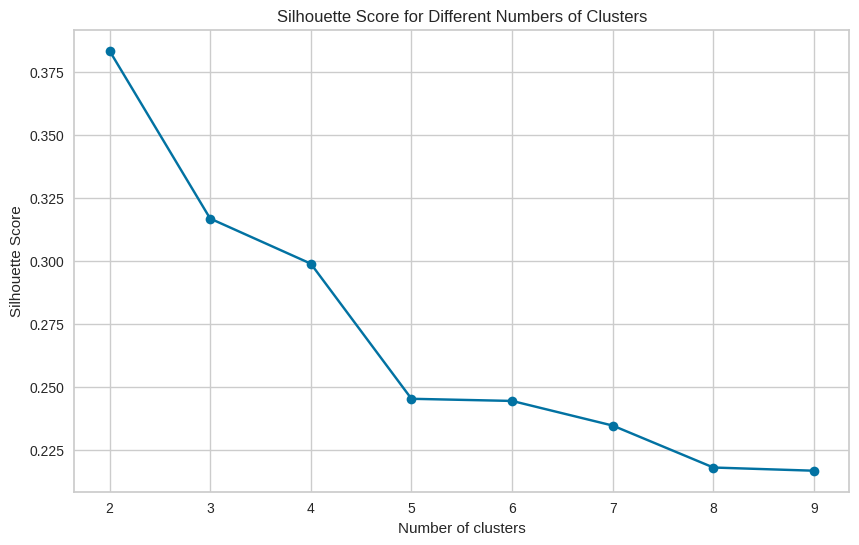

In [23]:
# Task 8: finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

#Graphic
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [35]:
# Task 9: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?
start_time = time.time()

kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(scaled_data)

end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

# Добавление меток кластеров в исходные данные
data['Cluster'] = kmeans_final.labels_

Execution time: 0.01 seconds


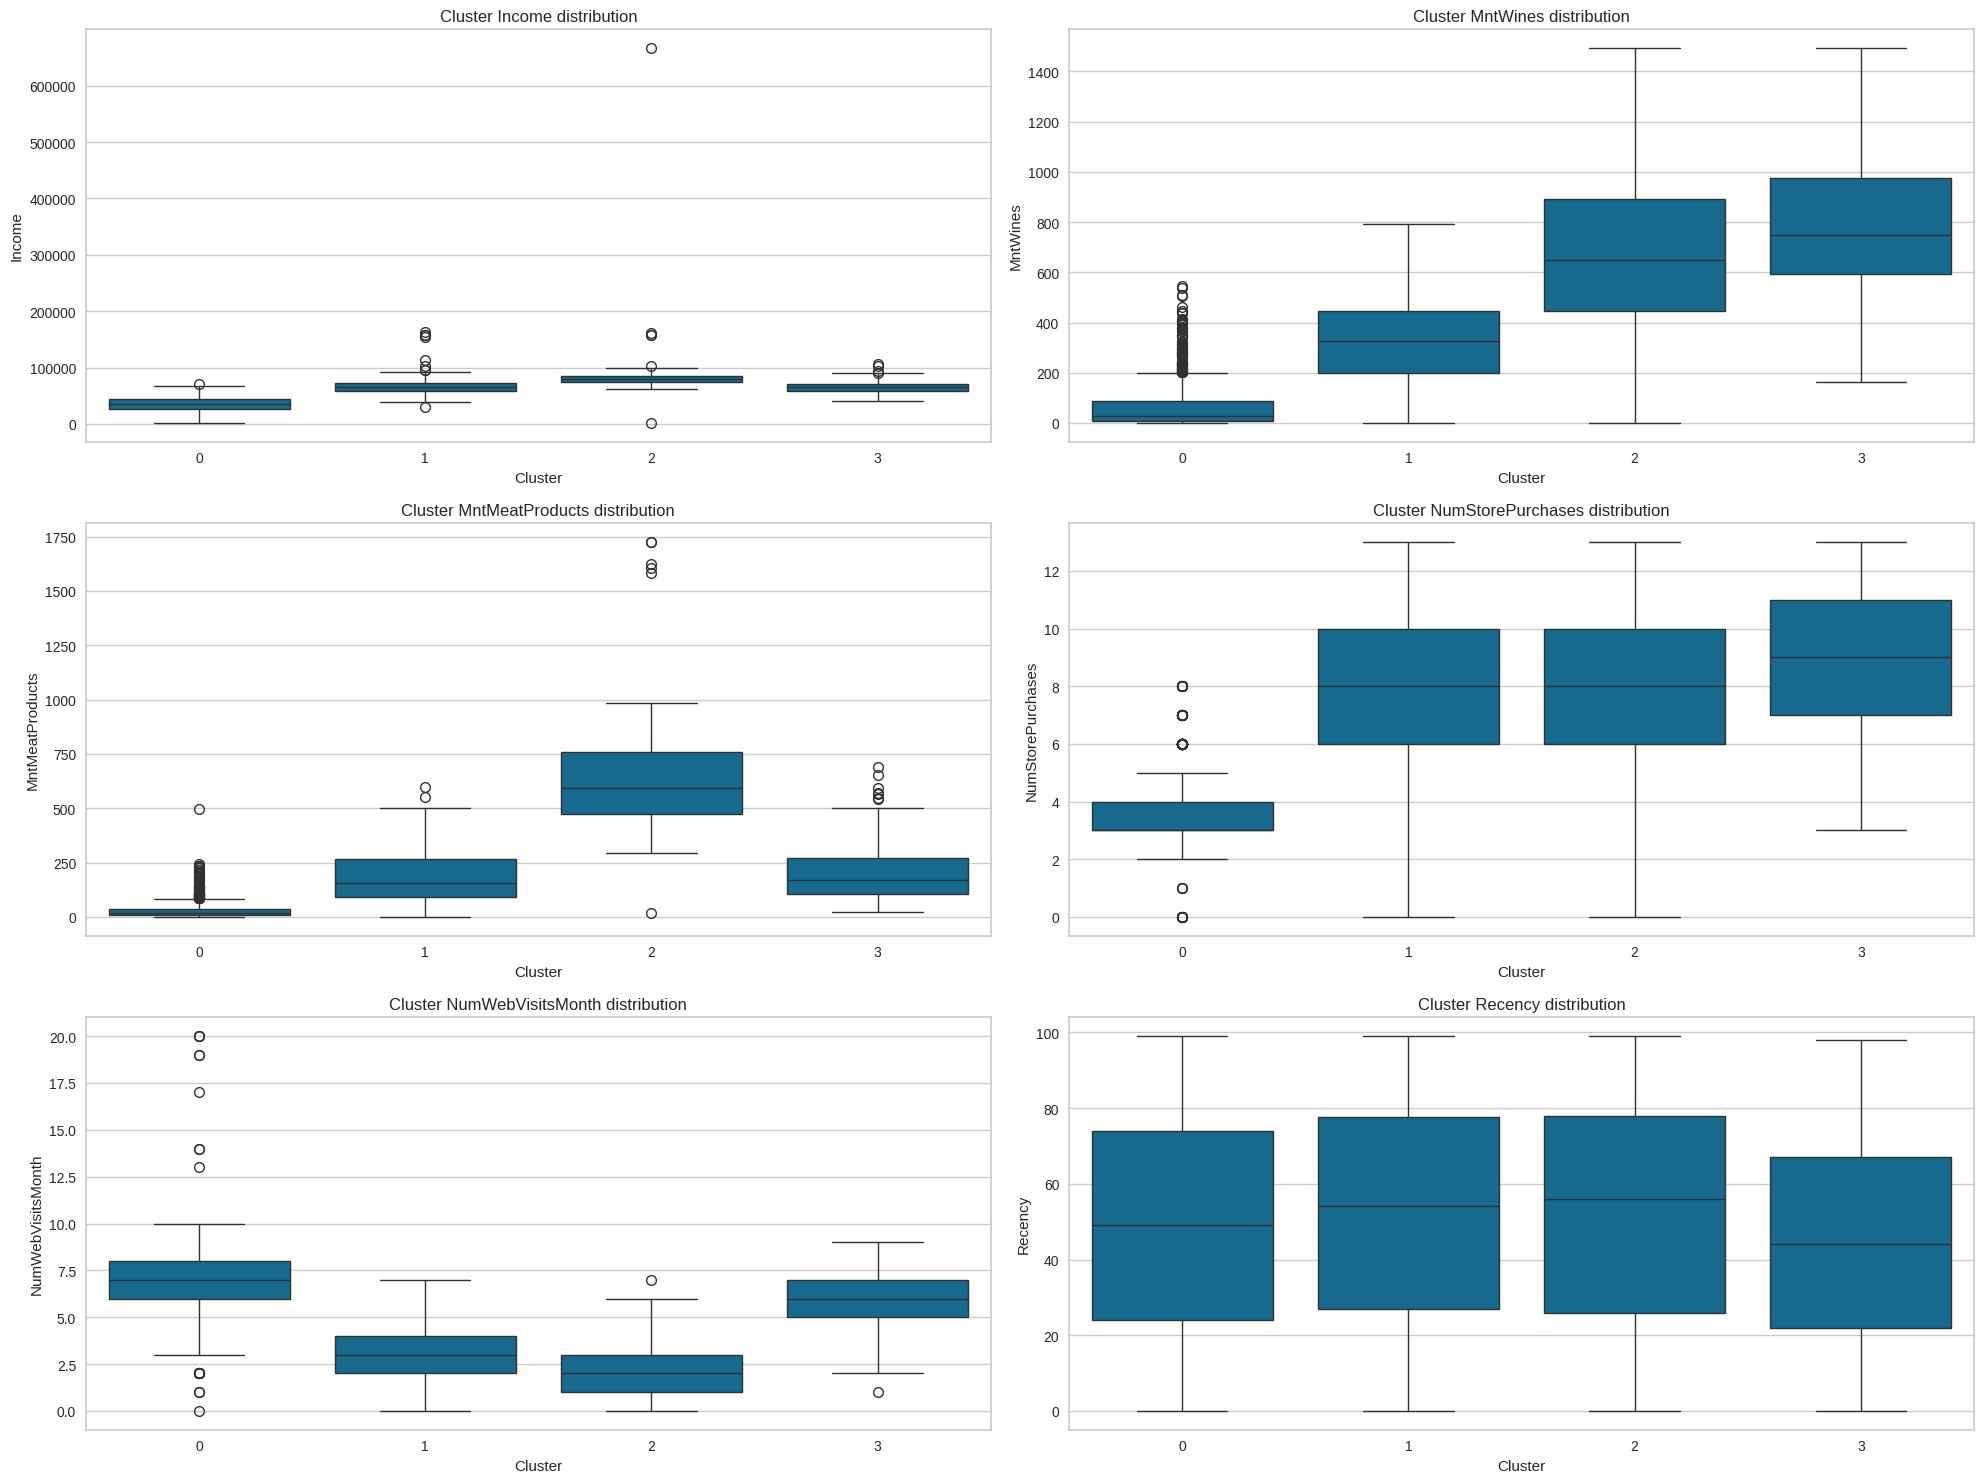

In [39]:
# Task 10: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'Cluster {feature} distribution')
plt.tight_layout()
plt.show()

Cluster 1:

- High income ( higher than 80,000)
- High spending on wine and meat
- They often shop in stores
- They rarely visit the site

Cluster 2:

- Low income ( lower than 40,000)
- Minimum food costs
- They rarely make purchases
- They often visit the site

Cluster 3:

- Average income (50,000)
- Moderate spending on groceries
- Average purchase frequency
- The balance between visits to the website and the store

Cluster 4:

- Different income levels
- Low Recency rate (recently made purchases)
- Moderate expenses
- Average purchase frequency

<Figure size 1500x800 with 0 Axes>

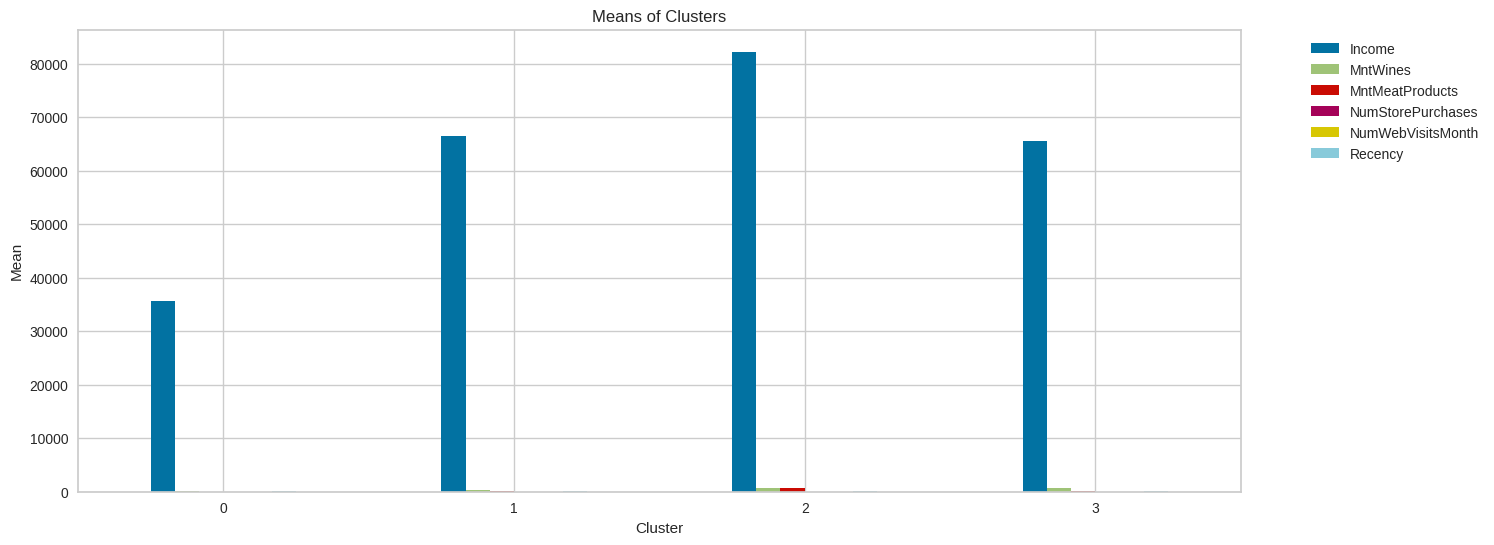

In [40]:
# Task 11: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.
cluster_profile = data.groupby('Cluster')[features].mean()

plt.figure(figsize=(15, 8))
cluster_profile.plot(kind='bar', figsize=(15, 6))
plt.title('Means of Clusters')
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Cluster 1:

- The main target group for premium products
- Loyal to offline stores
- Potential for cross-selling

Cluster 2:

- Price-sensitive
- They actively use the Internet
- We need special offers and discounts

Cluster 3:

- The majority of clients
- The balance of price and quality is important
- They respond to standard marketing campaigns

Cluster 4:

- A promising retention group
- It is important to keep in touch
- The ability to increase the frequency of purchases

# Task 12:  Based on the cluster insights, what business recommendations can be provided?






# For the first customers type:

- Develop a VIP loyalty program with exclusive offers
- Offer premium products and personalized service


# For the second customers type :

- Create a program of discounts and special offers
- Improve the online shopping experience


# For the third customers type:

- Optimize standard marketing campaigns
- To offer products that are balanced in price and quality


# For the fourth customers type:

- Implement a retention program (for example, a discount on the next purchase)
- Establish regular communication
